In [1]:
# pip install streamlit

In [2]:
# pip install seaborn

In [3]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import plotly.express as px 
import streamlit as st
import warnings
import numpy as np
warnings.filterwarnings('ignore')
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool, NumeralTickFormatter
from bokeh.transform import factor_cmap
from bokeh.transform import linear_cmap
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
import plotly.graph_objects as go
from bokeh.palettes import Spectral10
import datetime
from bokeh.transform import jitter

In [5]:
df = pd.read_csv("churn.csv", encoding = "ISO-8859-1")

In [6]:
df.head()

,ExistingLost,Age,Gender,Dependent,Education,Marital,Income,CardCat,PeriodOfRelationship,TotalNumberProducts,MonthsInactive,ContactsCount,CreditLimit,TotalBal,AvgOpenToBuy,ChangeTransAmountQ4Q1,TotalTransAmt,TotalTransCountQ4Q1,ChangeTransCountQ4Q1,UtilRatio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
4,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


In [7]:
df.describe()

,Age,Dependent,PeriodOfRelationship,TotalNumberProducts,MonthsInactive,ContactsCount,CreditLimit,TotalBal,AvgOpenToBuy,ChangeTransAmountQ4Q1,TotalTransAmt,TotalTransCountQ4Q1,ChangeTransCountQ4Q1,UtilRatio
count,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000
mean,46.347691,2.337805,35.981359,3.819376,2.342607,2.454456,8492.773831,1167.501624,7325.272207,0.760584,4394.299816,64.503319,0.711508,0.282313
std,8.041225,1.291649,8.002609,1.544444,0.995104,1.104917,9126.072520,812.315606,9131.217585,0.223139,3468.461606,23.809330,0.238693,0.278731
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2498.000000,463.000000,1248.000000,0.629000,2089.000000,44.000000,0.583000,0.026000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4287.000000,1282.000000,3250.000000,0.735000,3831.000000,67.000000,0.700000,0.186000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,10729.000000,1781.000000,9491.000000,0.858000,4740.000000,80.000000,0.818000,0.515000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,17995.000000,134.000000,3.714000,0.999000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7081 entries, 0 to 7080
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ExistingLost           7081 non-null   object 
 1   Age                    7081 non-null   int64  
 2   Gender                 7081 non-null   object 
 3   Dependent              7081 non-null   int64  
 4   Education              7081 non-null   object 
 5   Marital                7081 non-null   object 
 6   Income                 7081 non-null   object 
 7   CardCat                7081 non-null   object 
 8   PeriodOfRelationship   7081 non-null   int64  
 9   TotalNumberProducts    7081 non-null   int64  
 10  MonthsInactive         7081 non-null   int64  
 11  ContactsCount          7081 non-null   int64  
 12  CreditLimit            7081 non-null   float64
 13  TotalBal               7081 non-null   int64  
 14  AvgOpenToBuy           7081 non-null   float64
 15  Chan

In [9]:
st.set_page_config(page_title = "Churning customers", page_icon = ":credit_card:", layout = "wide")

In [10]:
st.title(":credit_card: Credit Card Churning Customers Analysis")
st.markdown('<style>div.block-container{padding-top:1rem;}</style>', unsafe_allow_html=True)
box_date = str(datetime.datetime.now().strftime("%d %B %Y"))
st.write(f"Last updated by:  \n {box_date}")

2023-11-22 14:26:43.154 
  command:

    streamlit run /usr/lib/python3/dist-packages/ipykernel_launcher.py [ARGUMENTS]


In [11]:
fl = st.file_uploader(":file_folder: Upload a file", type=(["csv", "txt", "xlsx", "xls"]))
if fl is not None:
    filename = fl.name
    st.write(filename)
    df = pd.read_csv(filename, encoding = "ISO-8859-1")
else:
    df = pd.read_csv("churn.csv", encoding = "ISO-8859-1")

In [12]:
st.divider()

DeltaGenerator()

In [13]:
# Create columns with a custom layout, including 'spacer' columns
col2, spacer, col3 = st.columns([3, 1.05, 3])

In [14]:
# Title for the sidebar
st.sidebar.header('Choose your filter:')

# Define categories and corresponding colors
categories = ['Attrited Customer', 'Existing Customer']
category_colors = ['#5E18EB', '#A579FF']
color_mapping = {'Attrited Customer': category_colors[0], 'Existing Customer': category_colors[1]}

# List of all columns for which you want to create filters
all_columns = ['Gender', 'Education', 'Marital', 'Income', 'CardCat', 'MonthsInactive',
               'Age', 'Dependent', 'PeriodOfRelationship', 'TotalNumberProducts',
               'ContactsCount', 'CreditLimit', 'TotalBal', 'AvgOpenToBuy',
               'ChangeTransAmountQ4Q1', 'TotalTransAmt', 'TotalTransCountQ4Q1',
               'ChangeTransCountQ4Q1', 'UtilRatio']

# Let the user select a column to plot
chosen_col = st.sidebar.selectbox('Select a column to plot', all_columns)

# Create filters in the sidebar
selected_filters = {}
for col in all_columns:
    if df[col].dtype == 'object':
        # Use multiselect for categorical columns
        selected_filters[col] = st.sidebar.multiselect(f'Select {col}', df[col].unique())
    else:
        # Use sliders for numerical columns
        min_val = df[col].min()
        max_val = df[col].max()
        selected_filters[col] = st.sidebar.slider(f'Select range for {col}', min_val, max_val, (min_val, max_val))

# Filtering the dataframe based on the selections
filtered_df = df.copy()
for col, values in selected_filters.items():
    if isinstance(values, list) and values:  # For categorical filters
        filtered_df = filtered_df[filtered_df[col].isin(values)]
    elif isinstance(values, tuple):  # For numerical filters
        filtered_df = filtered_df[filtered_df[col].between(values[0], values[1])]

# Create a container for the plot
plot_container = st.container()

with col2:
    # Custom HTML for the title with larger font size and bold text
    st.markdown("""
    <style>
    .title {
        font-size: small; 
        font-weight: bold;
    }
    </style>
    <div class="title">Customize Your Analysis: Select Variables to Compare Results</div>
    """, unsafe_allow_html=True)    

    # Create and display the count plot if a column is selected
    if chosen_col:
        fig = px.histogram(filtered_df, x=chosen_col, color='ExistingLost',
                           color_discrete_map=color_mapping,
                           title=f'Count of ExistingLost for {chosen_col}')
        fig.update_layout(title_text='')
        st.plotly_chart(fig)
    else:
        st.write("Please select a column for plotting.")

In [15]:
# Convert 'ExistingLost' to a numeric value: for example, 'Existing Customer' to 1, and 'Lost' to 0
df['CurrentChurned'] = df['ExistingLost'].apply(lambda x: 1 if x == 'Existing Customer' else 0)

# Now include this new numeric column in your correlation matrix calculation
corr_matrix = df[['CurrentChurned', 'Age', 'PeriodOfRelationship', 'TotalNumberProducts', 'MonthsInactive', 
                  'ContactsCount', 'CreditLimit', 'TotalBal', 'AvgOpenToBuy', 
                  'ChangeTransAmountQ4Q1', 'TotalTransAmt', 'TotalTransCountQ4Q1', 
                  'ChangeTransCountQ4Q1', 'UtilRatio']].corr()

# Custom color scale
color_scale = [
    [0, '#A579FF'],  
    [1, '#5E18EB']   
]

# Generate the heatmap
fig = px.imshow(corr_matrix, 
                x=corr_matrix.columns, 
                y=corr_matrix.columns, 
                color_continuous_scale=color_scale,
                text_auto=True, 
                aspect="auto")

fig.update_layout(coloraxis_colorbar=dict(
    title='Correlation',
    tickvals=[-1, 1], 
    ticktext=['Minimum', 'Maximum'],
    lenmode='fraction', 
    len=1
))

with col3:
    # Custom HTML for the title with larger font size and bold text
    st.markdown("""
    <style>
    .title {
        font-size: small; 
        font-weight: bold;
    }
    </style>
    <div class="title">Correlation Matrix of Credit Card Customer Attributes</div>
    """, unsafe_allow_html=True)
    
    st.plotly_chart(fig)

In [16]:
st.divider()

DeltaGenerator()

In [17]:
# Convert 'MonthsInactive' to string if treating as categorical
df['MonthsInactive'] = df['MonthsInactive'].astype(str)

# Manually create a jitter effect
df['JitteredMonthsInactive'] = df['MonthsInactive'].apply(lambda x: float(x) + np.random.uniform(-0.3, 0.3))

# Create the Plotly scatter plot
fig = px.scatter(df, 
                 x='PeriodOfRelationship', 
                 y='JitteredMonthsInactive', 
                 color='ExistingLost',
                 labels={'JitteredMonthsInactive': 'Months Inactive'},
                 title="Customer Relationship Analysis",
                 color_discrete_sequence=['#A579FF', '#5E18EB'])

# Customize the hover data
fig.update_traces(hovertemplate="Churn Status: %{color}<br>Period of Relationship: %{x}<br>Months Inactive: %{y}")
fig.update_layout(title_text='')

# Customize the layout
fig.update_layout(legend_title_text='Churn Status')

with col2:
    # Custom HTML for the title with larger font size and bold text
    st.markdown("""
    <style>
    .title {
        font-size: small; 
        font-weight: bold;
    }
    </style>
    <div class="title">Customer relationship analysis</div>
    """, unsafe_allow_html=True)
    
    st.plotly_chart(fig)

In [18]:
# Define categories and corresponding colors
categories = ['Attrited Customer', 'Existing Customer']
category_colors = ['#5E18EB', '#A579FF']
color_mapping = {'Attrited Customer': category_colors[0], 'Existing Customer': category_colors[1]}

# Plot the histogram with LoanAmount on the x-axis and stacked Loan_Status
fig = px.histogram(df,
                   x="CardCat",
                   color="ExistingLost",
                   color_discrete_map=color_mapping,
                   barmode='stack',
                   labels={'CartCat': 'Card Category'},
                   text_auto=True)

# Update layout for centering the title and adjusting y-axis title
fig.update_layout(title_x=0.5, yaxis_title='Count')
fig.update_layout(title_text='')
    
with col3:

    # Custom HTML for the title of the new chart
    st.markdown("""
    <style>
    .title {
        font-size: small; 
        font-weight: bold;
    }
    </style>
    <div class="title">Stacked Distribution of Churned and Existing Customers by Card Category</div>
    """, unsafe_allow_html=True)
    
    # Display the new histogram chart
    st.plotly_chart(fig)

In [19]:
newdf = df.copy()

In [20]:
le = LabelEncoder()
categorical = ['ExistingLost', 'Gender', 'Education', 'Marital', 'Income', 'CardCat']
for col in newdf[categorical]:
    newdf[col]=le.fit_transform(newdf[col])

In [21]:
#Create a StandardScaler object  
scaler = StandardScaler() 
# Select the columns to be normalized  
cols_to_norm = ['Age', 'Dependent', 'PeriodOfRelationship', 'TotalNumberProducts',
       'MonthsInactive', 'ContactsCount', 'CreditLimit', 'TotalBal',
       'AvgOpenToBuy', 'ChangeTransAmountQ4Q1', 'TotalTransAmt',
       'TotalTransCountQ4Q1', 'ChangeTransCountQ4Q1', 'UtilRatio']
# Fit the scaler to the selected columns and transform the data  
newdf[cols_to_norm] = scaler.fit_transform(newdf[cols_to_norm])

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score
import seaborn as sns
rfc = RandomForestClassifier()
X = newdf.drop(columns=['ExistingLost']).values
y = newdf['ExistingLost'].values
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 38) # 80% training and 20% test

In [23]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [24]:
# Making predictions
predictions = rfc.predict(X_test)

In [25]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00      1191

    accuracy                           1.00      1417
   macro avg       1.00      1.00      1.00      1417
weighted avg       1.00      1.00      1.00      1417



Confusion Matrix:
[[ 226    0]
 [   0 1191]]


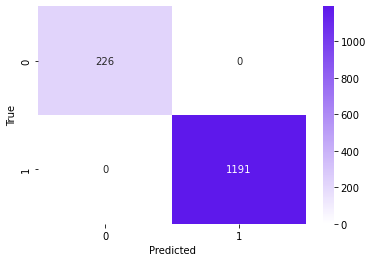

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00      1191

    accuracy                           1.00      1417
   macro avg       1.00      1.00      1.00      1417
weighted avg       1.00      1.00      1.00      1417



In [26]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix as plain text
print("Confusion Matrix:")
print(cm)

# Create a custom colormap using the desired color
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["white", "#5E18EB"])

# Call a method heatmap() to plot confusion matrix with custom color map
sns.heatmap(cm, annot=True, cmap=custom_cmap, fmt='d')

# Set axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

# Show the plot
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

In [27]:
print(accuracy_score(y_test,predictions))

1.0


In [28]:
#Grid sear and Kfold

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, scoring='accuracy')

In [29]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.946565,0.044054,0.193774,0.001452,2,{'max_depth': 2},0.9391,0.952339,0.946161,0.941748,0.969965,0.949862,0.011006,4
1,2.138274,0.060812,0.191624,0.001864,7,{'max_depth': 7},1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
2,2.386427,0.072888,0.203324,0.005820,12,{'max_depth': 12},1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
3,2.401753,0.085564,0.202515,0.006437,17,{'max_depth': 17},1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1


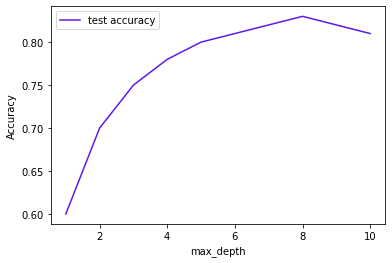

In [30]:
# Replace the following line with your actual scores data
scores = {'param_max_depth': list(range(1, 11)), 'mean_test_score': [0.6, 0.7, 0.75, 0.78, 0.8, 0.81, 0.82, 0.83, 0.82, 0.81]}

# Define your theme color
theme_color = "#5E18EB"

# Plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"],
         scores["mean_test_score"],
         label="test accuracy",
         c=theme_color)
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [31]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [32]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [33]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 1.0 using {'max_depth': 4, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [34]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [35]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200)

In [36]:
# predict
predictions = rfc.predict(X_test)

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00      1191

    accuracy                           1.00      1417
   macro avg       1.00      1.00      1.00      1417
weighted avg       1.00      1.00      1.00      1417



Confusion Matrix:
[[ 226    0]
 [   0 1191]]


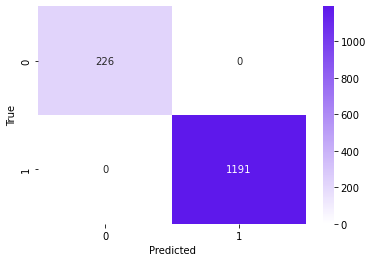

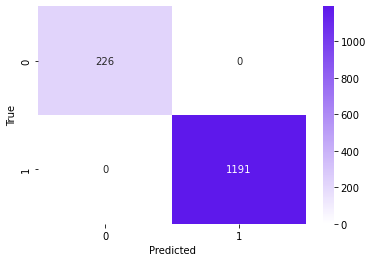

In [38]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix as plain text
print("Confusion Matrix:")
print(cm)

# Create a custom colormap using the desired color
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["white", "#5E18EB"])

# Create matplotlib figure and plot confusion matrix
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap=custom_cmap, fmt='d', ax=ax)

ax.set(xlabel="Predicted", ylabel="True")

# Create matplotlib figure and plot confusion matrix
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap=custom_cmap, fmt='d', ax=ax)

# Add labels to axes
ax.set(xlabel="Predicted", ylabel="True") 

with col2:

    # Custom HTML for the title of the new chart
    st.markdown("""
    <style>
    .title {
        font-size: small; 
        font-weight: bold;
    }
    </style>
    <div class="title">Random Forest Classification - Prediction of Churned Customers</div>
    """, unsafe_allow_html=True)
    
    # Show figure in Streamlit
    st.pyplot(fig)

In [39]:
print(accuracy_score(y_test,predictions))

1.0


In [40]:
with col3:

    # Custom HTML for the title of the new chart
    st.markdown("""
    <style>
    .title {
        font-size: small; 
        font-weight: bold;
    }
    </style>
    <div class="title">Random Forest Classification Prediction Accuracy Score</div>
    <div style="color: #5E18EB; font-size: 96px; text-align: center;">1</div>
    """, unsafe_allow_html=True)

In [41]:
csv = df.to_csv(index=False).encode('utf-8')
st.download_button('Download Data', data=csv, file_name='Data.csv', mime='text/csv')

False